In [1]:
import h5py
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from atomxs.lib_utils import get_xs, get_MT
from atomxs.attenuation import mass_attenuation
from materials.isotopes import H, O, Pb
from materials import Material

# Examples of the extraction of materials

In [2]:
lead = Material('lead', composition={Pb:1}, fraction_type='atomic', density=11.35)

In [3]:
energy_grid = np.geomspace(1e2, 2e7, int(1e6))
atomx_Pb_μ = mass_attenuation(lead, energy_grid, interp_method='log-log')

comparison to nist xs

In [5]:
energy_nist = np.array([1.00000E-03, 1.50000E-03,2.00000E-03,2.48400E-03,2.48400E-03,2.53429E-03,2.58560E-03,2.58560E-03,3.00000E-03,3.06640E-03,3.06640E-03,3.30130E-03,3.55420E-03,3.55420E-03,3.69948E-03,3.85070E-03,3.85070E-03,4.00000E-03,5.00000E-03,6.00000E-03,8.00000E-03,1.00000E-02,1.30352E-02,1.30352E-02,1.50000E-02,1.52000E-02,1.52000E-02,1.55269E-02,1.58608E-02,1.58608E-02,2.00000E-02,3.00000E-02,4.00000E-02,5.00000E-02,6.00000E-02,8.00000E-02,8.80045E-02,8.80045E-02,1.00000E-01,1.50000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,8.00000E-01,1.00000E+00,1.25000E+00,1.50000E+00,2.00000E+00,3.00000E+00,4.00000E+00,5.00000E+00,6.00000E+00,8.00000E+00,1.00000E+01,1.50000E+01,2.00000E+01])
nist_Pb_μ = np.array([5.210E+03,2.356E+03,1.285E+03,8.006E+02,1.397E+03,1.726E+03,1.944E+03,2.458E+03,1.965E+03,1.857E+03,2.146E+03,1.796E+03,1.496E+03,1.585E+03,1.442E+03,1.311E+03,1.368E+03,1.251E+03,7.304E+02,4.672E+02,2.287E+02,1.306E+02,6.701E+01,1.621E+02,1.116E+02,1.078E+02,1.485E+02,1.416E+02,1.344E+02,1.548E+02,8.636E+01,3.032E+01,1.436E+01,8.041E+00,5.021E+00,2.419E+00,1.910E+00,7.683E+00,5.549E+00,2.014E+00,9.985E-01,4.031E-01,2.323E-01,1.614E-01,1.248E-01,8.870E-02,7.102E-02,5.876E-02,5.222E-02,4.606E-02,4.234E-02,4.197E-02,4.272E-02,4.391E-02,4.675E-02,4.972E-02,5.658E-02,6.206E-02])

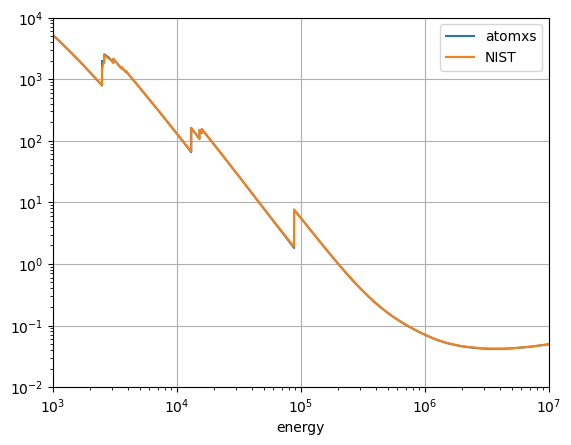

In [9]:
atomx_Pb_μ.plot(yscale='log', xscale='log', label='atomxs')
plt.loglog(energy_nist*1e6,nist_Pb_μ, label='NIST')
plt.xlim([1e3,1e7])
plt.ylim([1e-2,1e4])
plt.grid(True)
plt.legend()

example of water xs

In [7]:
water = Material('water', composition={H:2, O:1}, fraction_type='atomic', density=1)
atomx_water_μ = mass_attenuation(water, energy_grid, interp_method='log-log')

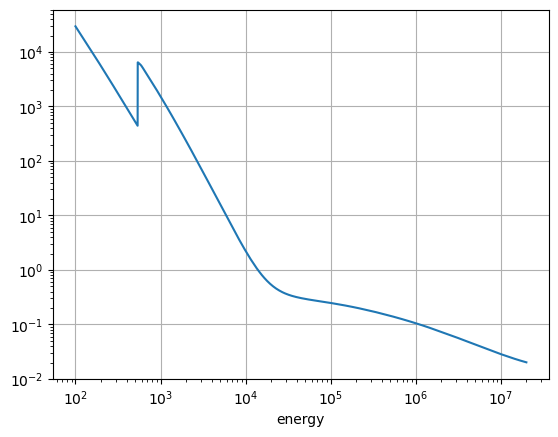

In [11]:
atomx_water_μ.plot(yscale='log', xscale='log')
plt.grid(True)


# get endf xs and the varous MT for various Z's in xarrray form

In [12]:
get_xs([10, 15], [501,504])

{10: {501: <xarray.DataArray 'Z10_MT501' (energy: 3840)>
  array([5.60187000e-06, 1.04596000e-05, 1.42918000e-05, ...,
         8.79842237e-01, 8.79847976e-01, 8.79880471e-01])
  Coordinates:
    * energy   (energy) float64 1.0 1.059 1.106 1.142 ... 9.63e+10 9.685e+10 1e+11,
  504: <xarray.DataArray 'Z10_MT504' (energy: 406)>
  array([1.93170000e-07, 2.16741000e-07, 2.36289000e-07, 2.52098000e-07,
         2.77817000e-07, 3.06160000e-07, 3.43517000e-07, 3.74497000e-07,
         3.99552000e-07, 4.40312000e-07, 4.85230000e-07, 5.44437000e-07,
         5.93538000e-07, 6.33247000e-07, 6.97849000e-07, 7.69040000e-07,
         8.62869000e-07, 9.40680000e-07, 1.00361000e-06, 1.10598000e-06,
         1.21880000e-06, 1.36752000e-06, 1.49086000e-06, 1.59060000e-06,
         1.75287000e-06, 1.93170000e-06, 2.16741000e-06, 2.36289000e-06,
         2.52098000e-06, 2.77817000e-06, 3.06160000e-06, 3.43515000e-06,
         3.74493000e-06, 3.99547000e-06, 4.40305000e-06, 4.85220000e-06,
         5.4442

In [3]:
get_MT([10,1])

{10: [501, 502, 504, 515, 516, 517, 522, 534, 535, 536, 537],
 1: [501, 502, 504, 515, 516, 517, 522, 534]}